# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цели проекта:** на основе данных сервиса Яндекс.Недвижимость проанализировать рынок недвижимости Санкт-Петербурга и Ленинградской области и на основе полученных результатов установить параметры, на основе которых можно определять рыночную стоимость объектов недвижимости.

**Задачи проекта:** выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных." data-toc-modified-id="Обзор-данных.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Количество-пропущенных-значений-для-каждого-столбца." data-toc-modified-id="Количество-пропущенных-значений-для-каждого-столбца.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Количество пропущенных значений для каждого столбца.</a></span></li><li><span><a href="#Удаление-пропусков-и-устранение-аномалий." data-toc-modified-id="Удаление-пропусков-и-устранение-аномалий.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Удаление пропусков и устранение аномалий.</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Добавление-новых-столбцов" data-toc-modified-id="Добавление-новых-столбцов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Добавление новых столбцов</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-параметров-объекта." data-toc-modified-id="Анализ-параметров-объекта.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Анализ параметров объекта.</a></span></li><li><span><a href="#Анализ-скорости-продажи-квартиры." data-toc-modified-id="Анализ-скорости-продажи-квартиры.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Анализ скорости продажи квартиры.</a></span></li><li><span><a href="#Влияние-различных-факторов-на-стоимость-объекта" data-toc-modified-id="Влияние-различных-факторов-на-стоимость-объекта-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Влияние различных факторов на стоимость объекта</a></span></li><li><span><a href="#Населенные-пункты-с-самой-низкой-и-высокой-стоимостью-квадратного-метра." data-toc-modified-id="Населенные-пункты-с-самой-низкой-и-высокой-стоимостью-квадратного-метра.-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Населенные пункты с самой низкой и высокой стоимостью квадратного метра.</a></span></li><li><span><a href="#Средняя-цена-каждого-километра-в-Санкт-Петербурге." data-toc-modified-id="Средняя-цена-каждого-километра-в-Санкт-Петербурге.-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Средняя цена каждого километра в Санкт-Петербурге.</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Обзор данных. 

In [1]:
#импортируем библиотеки, которые будем использовать в процессе работы
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
pd.options.mode.chained_assignment = None #не показывать ошибки Pandas

In [2]:
#просматриваем данные
data = pd.read_csv('/datasets/real_estate_data.csv')
data.head(1)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...


Данные склеились в одну строку, разделим данные и перезапишем датафрейм.

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

pd.set_option('display.max_columns', None) #увеличить максимальное количество отображающихся столбцов

data.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN


Выведем основную информацию о датафремйме.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим общую гистограмму для всех числовых столбцов таблицы.

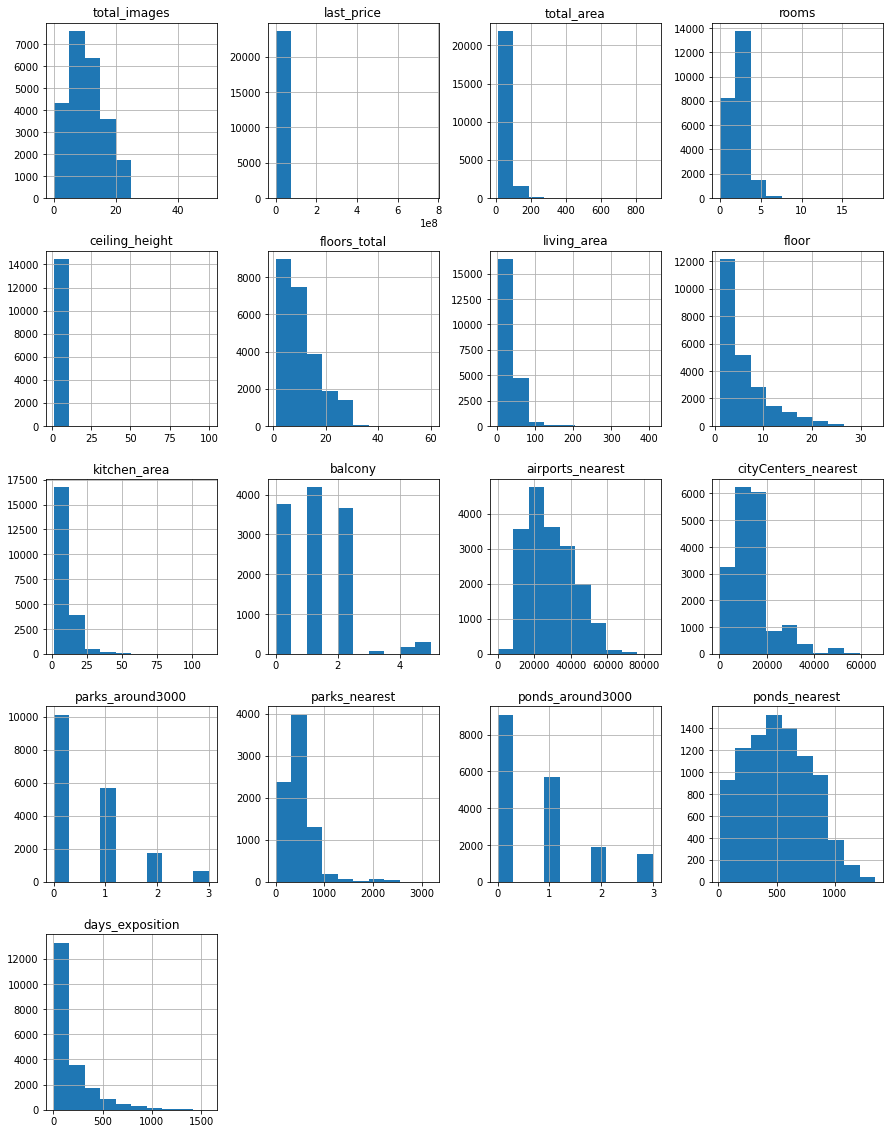

In [5]:
data.hist(figsize=(15, 20));

Из представленных гистограмм видно, что:
- больше всего представлено объектов с 5-10 фотографиями, объявления о которых размещались не более 125 дней;
- основную часть выборки представлют квартиры до 100 $м^2$с жилой площадью до $50м^2$, с двумя или тремя комнатами, расположженные 1-5 этажах в домах высотой до 20 этажей, и имеющие 1-2 балкона;
- самые популярные по расположению объекты находятся поблизости от центра города, в 20 км от аэропорта, в полукилометре от ближайшего парка или пруда;
- нельзя сделать выводов по гистограммам с ценой на момент снятия публикации и информацией о высоте потолков;
- наблюдаются аномально высокие значения в столбцах с общей площадью, количеством комнат и ценой, необходимо удалить их перед дальнейшей работой.

## Предобработка данных

### Количество пропущенных значений для каждого столбца.

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Наблюдаются пропуски в следующих столбцах: высота потолков, этажей в доме,жилая площадь, тип помещения (квартира или апартаменты), площадь кухни, наличие балкона, название населенного пункта, удаленность от центра города, аэропорта, парка или пруда и количество парков и прудов рядом, сколько дней объявление было размещено.

### Удаление пропусков и устранение аномалий.

In [7]:
#создадим переменную, в которой сохраним количество строк до обработки аномалий, чтобы потом узнать
#какое количество данных мы удалили
old_data = data.shape[0]

**<span style="color:green">1) Высота потолков</span>**

In [8]:
#посмотрим значения в этом столбце
print(data['ceiling_height'].unique())
#видно много таких значений, как 25, 27, 100 и т.п. Удалим их и вместе с пропусками заполним медианным значением по столбцу.
data.loc[(data['ceiling_height']<=2)|(data['ceiling_height']>=10)|(data['ceiling_height'].isna()), 'ceiling_height'] = data['ceiling_height'].median()
data['ceiling_height'].unique()

[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9
   3.18   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83
   3.52   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19
   3.24   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37
   3.09   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68
   3.22   3.27  27.     4.1    2.93   3.46  24.     3.47   3.33   3.63
   3.32  26.     1.2    8.3    2.98   2.86   3.17   4.4    3.28   3.04
   4.45   5

array([2.7 , 2.65, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 4.15,
       3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 , 3.06,
       2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 5.2 , 2.87, 2.66,
       2.59, 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16, 3.62,
       3.12, 2.53, 2.74, 2.96, 2.46, 5.3 , 5.  , 2.79, 2.95, 4.06, 2.94,
       3.82, 3.54, 3.53, 2.83, 4.7 , 2.4 , 3.38, 3.01, 5.6 , 3.65, 3.9 ,
       3.18, 3.35, 2.3 , 3.57, 2.48, 2.62, 2.82, 3.98, 2.63, 3.83, 3.52,
       3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19, 3.24, 4.8 ,
       4.5 , 4.2 , 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 8.  , 3.26, 3.34,
       2.81, 3.44, 2.97, 3.14, 4.37, 2.68, 3.22, 3.27, 4.1 , 2.93, 3.46,
       3.47, 3.33, 3.63, 3.32, 8.3 , 2.98, 2.86, 3.17, 4.4 , 3.28, 3.04,
       4.45, 5.5 , 3.84, 3.23, 3.02, 3.21, 3.43, 3.78, 4.3 , 3.39, 2.69,
       3.31, 4.65, 3.56, 2.2 , 3.51, 3.93, 3.42, 2.

**<span style="color:green">2) Количество балконов</span>**

In [9]:
#посмотрим уникальные значения в столбце с количеством балконов
print(data['balcony'].unique())
#заменим пропуски на 0, подразумевая, что пропуски оказались там по причине отсуствия балконов
data['balcony'] = data['balcony'].fillna(value=0)


[nan  2.  0.  1.  5.  4.  3.]


**<span style="color:green">3) Жилая площадь </span>**

In [10]:
#заменим пропуски в жилой площади на медианное значение по каждому из количеств комнат
#посмотрим количество колмнат
print(data['rooms'].unique())
#19 комнат - это много, посмотрим такой объект внимательнее
display(data[data['rooms']==19])
#19 комнат на площади 374 квадратных метра - выглядит достоверно, значит это не аномальные значения и с ними можно работать
for d in data['rooms'].unique():
    data.loc[(data['rooms']==d)&(data['living_area'].isna()), 'living_area'] = data.loc[(data['rooms']==d), 'living_area'].median()


[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14498,6,32250000.0,374.6,2018-06-09T00:00:00,19,2.65,5.0,264.5,2,NaN,False,False,27.6,0.0,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0


count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

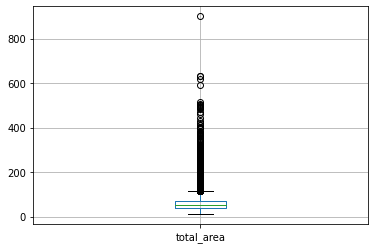

In [11]:
#в данном столбце имеются аномальные значения, необходимо устранить их
#сначала посмотрим на данные
data.boxplot(column='total_area')
display(data['total_area'].describe())
#считаем количество объектов до обработки
count1 = data['total_area'].count()

In [12]:
#посмотрим на выбивающиеся аномальные значения
data['total_area'].sort_values(ascending=False).head(10)

19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
4237     517.0
8018     507.0
5893     500.0
15016    500.0
12401    495.0
Name: total_area, dtype: float64

In [13]:
#объекты с общей площадью более 300 квадратных метров являются редкими, отбросим их как аномальные
data = data.loc[data['total_area'] <= 300]
display(data['total_area'].describe())
count2 = data['total_area'].count()
#смотрим, не выбросили ли слишком много данных
display(f'Процент данных, которые остались после обработки: {(count2/count1)*100:0.2f}%')

count    23638.000000
mean        59.451020
std         30.540964
min         12.000000
25%         40.000000
50%         52.000000
75%         69.400000
max        300.000000
Name: total_area, dtype: float64

'Процент данных, которые остались после обработки: 99.74%'

**<span style="color:green">4) Площадь кухни</span>**

In [14]:
#аналогичным образом поступим с площадью кухни: заменим пропуски медианым значением в зависимости от количества команат
#также мы учитываем, что в данных имеются студии и в них нет отдельной кухни, поэтому для заполнения пропусков используем 
#примерно треть от общей жилой площади (треть - потому что примерно такую площадь занимает зона кухни в квартирах-студиях)
for d in data['rooms'].unique():
    if d == 0:
        data.loc[(data['rooms']==d)&(data['kitchen_area'].isna()), 'kitchen_area'] = data['living_area']/3
    else:
        data.loc[(data['rooms']==d)&(data['kitchen_area'].isna()), 'kitchen_area'] = data.loc[(data['rooms']==d), 'kitchen_area'].median()


**<span style="color:green">5) Является ли квартира апартаментом</span>**

In [15]:
#будем считать, что пропуск в этом столбце означает, что квартира не является апартаментом
data['is_apartment'] = data['is_apartment'].fillna(value=False)


**<span style="color:green">6) Название населенного пункта</span>**

In [16]:
#заменим пропуски в названии населенного пункта на 'unknown'
data['locality_name'] = data['locality_name'].fillna('unknown')
print(data['locality_name'].isna().sum())
# также удалим неявные дубликаты в названиях населенных пунктов
data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок')

0


**<span style="color:green">7) Наличие парков и прудов в радиусе 3 км и расстояния до ближайших парков и прудов</span>**

In [17]:
#допустим, что пропуски в данных в столбцах с количеством парков и прудов возникли по причине того,
#что в радиусе 3 км от объекта парков и прудов нет, заменим все пропуски на ноль
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)
#аналогичным образом можно поступить и с расстоянием до ближайших парков и прудов, подразумевая,
#что если там есть пропуск, то это значит, что ближайшие парки и пруды находятся на расстоянии более 3 км
#проверим данну гипотезу и посмотрим максимально возможное значение в этих столбцах
print(data['parks_nearest'].max())
print(data['ponds_nearest'].max())
#гипотеза подтвердилась: если парки есть в радиусе 3 км, то у них указано расстояние до ближайшего
#(не более около 3км), с прудами такая же ситуация, если пруда нет в радиусе 3 км, то и его наличие не
#указано. Поэтому оставим пропуски в данных столбцах.


3190.0
1344.0


In [18]:
#Еще раз проверим количество пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5538
cityCenters_nearest      5517
parks_around3000            0
parks_nearest           15597
ponds_around3000            0
ponds_nearest           14569
days_exposition          3168
dtype: int64

**<span style="color:green">8) Количество комнат</span>**

count    23638.000000
mean         2.059142
std          1.045549
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

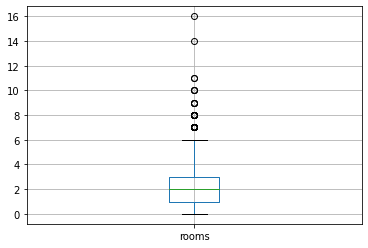

In [19]:
#в данном столбце имеются аномальные значения, необходимо устранить их
#сначала посмотрим на данные
data.boxplot(column='rooms')
display(data['rooms'].describe())
#считаем количество объектов до обработки
count1 = data['rooms'].count()

In [20]:
#объекты с количеством комнат более 5 являются редкими, отбросим их как аномальные
data = data.loc[data['rooms'] <= 5]
display(data['rooms'].describe())
count2 = data['rooms'].count()
#смотрим, не выбросили ли слишком много данных
display(f'Процент данных, которые остались после обработки: {(count2/count1)*100:0.2f}%')

count    23480.000000
mean         2.027896
std          0.970512
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

'Процент данных, которые остались после обработки: 99.33%'

**<span style="color:green">9) Цена объекта</span>**

count    2.348000e+04
mean     6.168340e+06
std      7.273146e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64

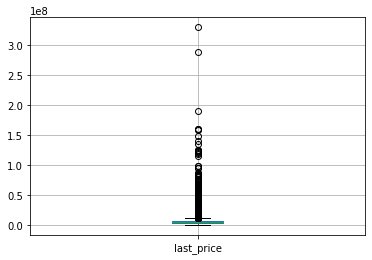

In [21]:
#в данном столбце имеются аномальные значения, необходимо устранить их
#сначала посмотрим на данные
data.boxplot(column='last_price')
display(data['last_price'].describe())
#считаем количество объектов до обработки
count1 = data['last_price'].count()

In [22]:
#объекты с ценой более 25 млн являются редкими, отбросим их как аномальные
data = data.loc[(data['last_price'] < 40_000_000)&(data['last_price'] > 500_000)]
display(data['last_price'].describe())
count2 = data['last_price'].count()
#смотрим, не выбросили ли слишком много данных
display(f'Процент данных, которые остались после обработки: {(count2/count1)*100:0.2f}%')

count    2.332600e+04
mean     5.798248e+06
std      4.350661e+06
min      5.200000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.623750e+06
max      3.999000e+07
Name: last_price, dtype: float64

'Процент данных, которые остались после обработки: 99.34%'

In [23]:
#создадим переменную с количеством строк после обработки
new_data= data.shape[0]
#проверим какое количество данных осталось после обработки аномалий (в процентах)
new_data / old_data *100

98.42609392801384

Удалила аномальные значения в следующих столбцах:
- высота потолков
- количество комнат
- общая площадь
- цена объекта

Остались пропуски: 
- в общем количестве этажей в доме, но их невозможно заменить на какое-либо значение, ведь если взять медианное число может оказаться, что квартира находится на этаже выше, чем общее количество этажей в доме, а если взять максимальное значение, тогда исказятся данные при последующей обработке;
- в столбцах с расстоянием до ближайшего пруда или парка, так как в данных локациях нет прудов или парков в ближайшей доступности;
- в столбцах с картографическими данными (расстояние до ближайшего аэропорта (м) и расстояние до центра города (м)), так как заполнение пропущенных значений медианным или среднем значением искажает результат, потому что объекты могут находиться в разных частях города;
- в столбцах с количеством дней в экспозиции, так как это значит, что на момент закрытия архива квартиры не были проданы.

### Замена типа данных

In [24]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['last_price'] = data['last_price']/1_000_000#переведем цену  в млн рублей

#замена float64 на float32 для экономии памяти
data['last_price'] = data['last_price'].astype('float32')
data['total_area'] = data['total_area'].astype('float32')
data['ceiling_height'] = data['ceiling_height'].astype('float32')
data['floors_total'] = data['floors_total'].astype('float32')
data['living_area'] = data['living_area'].astype('float32')
data['kitchen_area'] = data['kitchen_area'].astype('float32')
data['airports_nearest'] = data['airports_nearest'].astype('float32')
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('float32')
data['parks_nearest'] = data['parks_nearest'].astype('float32')
#data['ponds_nearest '] = data['ponds_nearest '].astype('float32')
data['days_exposition'] = data['days_exposition'].astype('float32')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23326 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23326 non-null  int64         
 1   last_price            23326 non-null  float32       
 2   total_area            23326 non-null  float32       
 3   first_day_exposition  23326 non-null  datetime64[ns]
 4   rooms                 23326 non-null  int64         
 5   ceiling_height        23326 non-null  float32       
 6   floors_total          23242 non-null  float32       
 7   living_area           23326 non-null  float32       
 8   floor                 23326 non-null  int64         
 9   is_apartment          23326 non-null  bool          
 10  studio                23326 non-null  bool          
 11  open_plan             23326 non-null  bool          
 12  kitchen_area          23326 non-null  float32       
 13  balcony         

Поменяли тип данных в колонке "количество дней в экспозиции" на формат datetime, в колонке "является ли квартира апартаментом" формат стал булевым, так как эта колонка принимает значения True или False, также колонки с количеством балков, парков и прудов рядом приняли целочисленный формат, чтобы значения в этих колонках не оказались дробными. Также перевели цену в млн рублей. Заменили все float64 на float32 для экономии памяти.

### Добавление новых столбцов

In [25]:
#добавим столбец с ценой одного квадратного метра
data['per_meter']=(data['last_price']/data['total_area'])*1000000 #умножаем на млн, чтобы получить цену в тысячах
#добавим столбец с днем недели публикации, где 0-понедельник,1 вторник и тд.
data['weekday'] = data['first_day_exposition'].dt.weekday
#добавим столбец с месяцем публикации
data['month'] = data['first_day_exposition'].dt.month
#добавим столбец с годом публикации
data['year'] = data['first_day_exposition'].dt.year
#добавим группировку по этажам: первый, последний,другой
def groupping_floor (row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data[['floor','floors_total']].apply(groupping_floor,axis=1)
data.head()
#добавим колонку с расстоянием до центра города в км
data['cityCenters_km'] = data['cityCenters_nearest']/1000
#также приведем некоторые колонки в более читабельный вид путем округления до двух цифр после запятой
data['per_meter'] = round(data['per_meter'],2)
data['cityCenters_km'] = data['cityCenters_km'].fillna(0).astype(int) #округляем значения, пропуски заполняем нулем
data['parks_nearest'] = round(data['parks_nearest'],2)
data['ponds_nearest'] = round(data['ponds_nearest'],2)
#проверим обновленный датасет
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,per_meter,weekday,month,year,floor_type,cityCenters_km
0,20,13.000,108.000000,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16
1,7,3.350,40.400002,2018-12-04,1,2.65,11.0,18.600000,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,18
2,10,5.196,56.000000,2015-08-20,2,2.65,5.0,34.299999,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.72,3,8,2015,другой,13
4,2,10.000,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8
5,10,2.890,30.400000,2018-09-10,1,2.65,12.0,14.400000,5,False,False,False,9.1,0,поселок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.79,0,9,2018,другой,0


## Исследовательский анализ данных

### Анализ параметров объекта.

**1) Общая площадь**

In [26]:
#функция, которая будет показывать значения из 1.5-го интервала
def quantile_functional (data, column):
    q1 = data[column].quantile (0.25)
    q3 = data[column].quantile (0.75)
    iqr = q3 - q1
    upper_limit = q3+1.5*iqr
    lower_limit = q1-1.5*iqr
    return upper_limit, lower_limit

count    23326.000000
mean        57.847065
std         26.483387
min         12.000000
25%         40.000000
50%         51.500000
75%         68.199997
max        295.000000
Name: total_area, dtype: float64

<AxesSubplot:>

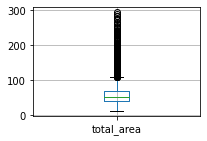

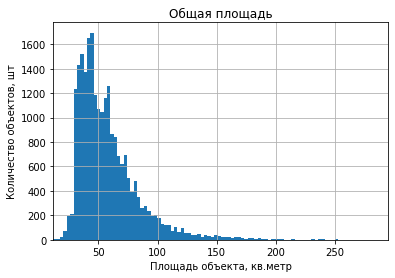

(110.49999237060547, -2.2999954223632812)

In [27]:
#построим графики 
display(data['total_area'].describe())
display(data.boxplot(column='total_area', figsize=(3,2)));
plt.show();
ax = data['total_area'].plot(kind='hist', 
                        title='Общая площадь',  
                        xlim=(data['total_area'].min(), data['total_area'].max()),
                        bins=100,
                        grid=True);
ax.set(xlabel="Площадь объекта, кв.метр", ylabel='Количество объектов, шт');
plt.show();
#посмотрим значения 1.5-х интервалов с помощью функции
quantile_functional (data, 'total_area')

Основная масса значений лежит в пределах от 12 до 110 $м^2$. Также можно сделать вывод, что малогабаритные форматы квартир площадь от 40 до 68 $м^2$ являются самыми популярными.

In [28]:
#создадим сводную таблицу, куда будем записывать все результаты анализа.
results = pd.DataFrame(
    {
        'Показатель': ['Общая площадь'],
        'Результат': ['40-68 м^2']
    }
)

**2) Жилая площадь**

count    23326.000000
mean        32.887356
std         16.818096
min          2.000000
25%         18.299999
50%         30.000000
75%         42.000000
max        180.000000
Name: living_area, dtype: float64

<AxesSubplot:>

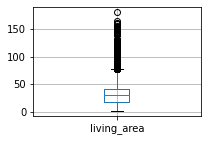

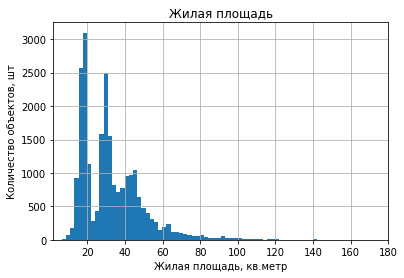

(77.55000114440918, -17.250001907348633)

In [29]:
#построим графики
display(data['living_area'].describe())
display(data.boxplot(column='living_area', figsize=(3,2)))
plt.show()
ax = data['living_area'].plot(kind='hist', 
                        title='Жилая площадь',  
                        xlim=(data['living_area'].min(), data['living_area'].max()),
                        bins=80,
                        grid=True)
ax.set(xlabel="Жилая площадь, кв.метр", ylabel='Количество объектов, шт')
plt.show()
#посмотрим значения 1.5-х интервалов с помощью функции
quantile_functional (data, 'living_area')

Основная масса значений лежит в пределах от 77 до 2 $м^2$. Такое низкое значение может быть связано с наличием небольших комнат, которые продают как квартиры или не точным заполнением данных. Также можно сделать вывод, что наиболее популярными являются квартиры с жилой площадью от 18 до 42 $м^2$. При этом виден провал в районе 20-27 $м^2$.

In [30]:
#добавим в свобдную таблицу
results.loc[ len(results.index )] = ['Жилая площадь', '18-42 м^2']

**3) Площадь кухни**

<AxesSubplot:>

count    23326.000000
mean        10.206331
std          5.002520
min          0.666667
25%          7.200000
50%          9.040000
75%         11.300000
max        100.699997
Name: kitchen_area, dtype: float64

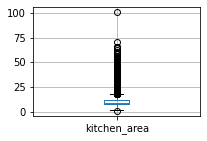

(17.450000762939453, 1.0499992370605469)

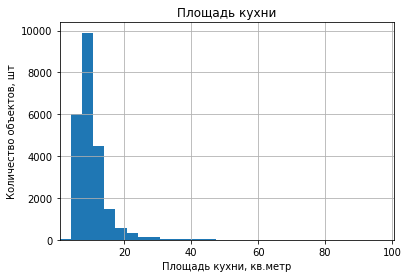

In [31]:
#построим графики 
display(data.boxplot(column='kitchen_area', figsize=(3,2)))
display(data['kitchen_area'].describe())
plt.show()
ax = data['kitchen_area'].plot(kind='hist', 
                        title='Площадь кухни',  
                        xlim=(data['kitchen_area'].min(), data['kitchen_area'].max()),
                        bins=30,
                        grid=True)
ax.set(xlabel="Площадь кухни, кв.метр", ylabel='Количество объектов, шт')
#посмотрим значения 1.5-х интервалов с помощью функции
quantile_functional (data, 'kitchen_area')

Основная масса значений лежит в пределах от 17 до 1 $м^2$. Такое низкое значение может быть связано с некорректным заполнением данных. самыми популярными квартирами являтся квартиры с площадью кухни от 7 до 12 $м^2$. При этом пик приходится на значение 8 $м^2$, вероятно, что большинство представленных объектов - панельки, поэтому это значение самое частовстречающееся.

In [32]:
#добавим в свобдную таблицу
results.loc[ len(results.index )] = ['Площадь кухни', '7-12 м^2']

**4) Цена объекта**

<AxesSubplot:>

count    23326.000000
mean         5.798248
std          4.350661
min          0.520000
25%          3.400000
50%          4.600000
75%          6.623750
max         39.990002
Name: last_price, dtype: float64

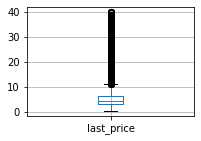

(11.459374785423279, -1.4356247186660767)

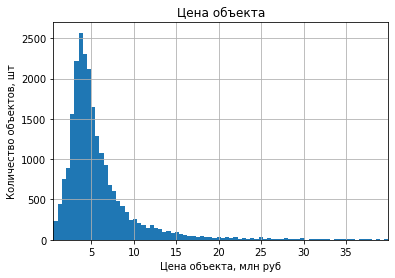

In [33]:
#построим графики 
display(data.boxplot(column='last_price', figsize=(3,2)))
display(data['last_price'].describe())
plt.show()
ax = data['last_price'].plot(kind='hist', 
                        title='Цена объекта',  
                        xlim=(data['last_price'].min(), data['last_price'].max()),
                        bins=80,
                        grid=True)
ax.set(xlabel="Цена объекта, млн руб", ylabel='Количество объектов, шт')
#посмотрим значения 1.5-х интервалов с помощью функции
quantile_functional (data, 'last_price')

Основная масса значений лежит в пределах от 11.5 до 0.5 млн рул. Большая часть объектов попадает в категорию от 3.5 до 6.5 млн рублей.

In [34]:
#добавим в свобдную таблицу
results.loc[ len(results.index )] = ['Цена объекта', '3.5-6.5 млн руб']

**5) Количество комнат.**

<AxesSubplot:>

count    23326.000000
mean         2.019077
std          0.963170
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

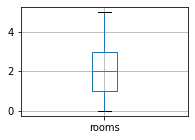

[Text(0.5, 0, 'Количество комнат, шт'),
 Text(0, 0.5, 'Количество объектов, шт')]

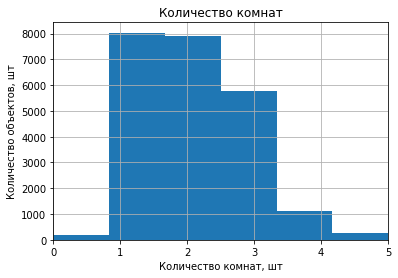

In [35]:
#построим графики
display(data.boxplot(column='rooms', figsize=(3,2)))
display(data['rooms'].describe())
plt.show()
ax = data['rooms'].plot(kind='hist', 
                        title='Количество комнат',  
                        xlim=(data['rooms'].min(), data['rooms'].max()),
                        bins=6,
                        grid=True)
ax.set(xlabel="Количество комнат, шт", ylabel='Количество объектов, шт')

Вывод: наиболее популярными форматами являются 1,2 и 3-х комнатные квартиры.

In [36]:
#добавим в свобдную таблицу
results.loc[ len(results.index )] = ['Количество комнат', 'от 1 до 3']

**6) Высота потолков.**

<AxesSubplot:>

count    23326.000000
mean         2.691722
std          0.217852
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64

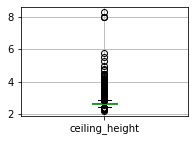

(2.850000262260437, 2.449999690055847)

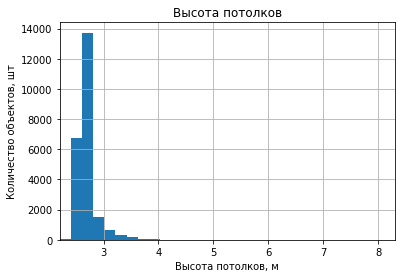

In [37]:
#построим графики
display(data.boxplot(column='ceiling_height', figsize=(3,2)))
display(data['ceiling_height'].describe())
plt.show()
ax = data['ceiling_height'].plot(kind='hist', 
                        title='Высота потолков',  
                        xlim=(data['ceiling_height'].min(), data['ceiling_height'].max()),
                        bins=30,
                        grid=True)
ax.set(xlabel="Высота потолков, м", ylabel='Количество объектов, шт')
#посмотрим значения 1.5-х интервалов с помощью функции
quantile_functional (data, 'ceiling_height')

Основная масса значений лежит в пределах от 2.44 до 2.85 м. Также можно сделать вывод, что самая распространенная высота потолков 2.6-2.7 м.

In [38]:
#добавим в свобдную таблицу
results.loc[ len(results.index )] = ['Высота потолков', 'от 2.6 до 2.7 м']

**7) Этаж квартиры.**

<AxesSubplot:>

count    23326.000000
mean         5.913959
std          4.902559
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

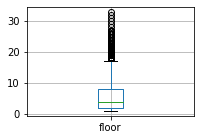

(17.0, -7.0)

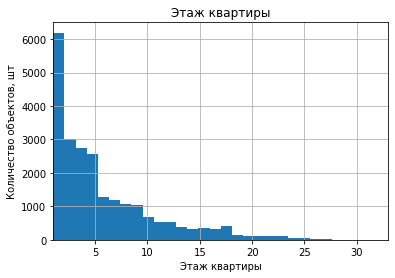

In [39]:
#построим графики
display(data.boxplot(column='floor', figsize=(3,2)))
display(data['floor'].describe())
plt.show()
ax = data['floor'].plot(kind='hist', 
                        title='Этаж квартиры',  
                        xlim=(data['floor'].min(), data['floor'].max()),
                        bins=30,
                        grid=True)
ax.set(xlabel="Этаж квартиры", ylabel='Количество объектов, шт');
#посмотрим значения 1.5-х интервалов с помощью функции
quantile_functional (data, 'floor')

Вывод: большая часть квартир находится с 1 по 17 этаж, самыми популярными являются квартиры со 2 по 8 этажи.

In [40]:
#добавим в свобдную таблицу
results.loc[ len(results.index )] = ['Этаж квартиры', 'со 2 по 8']

**8) Тип этажа кваритры.**

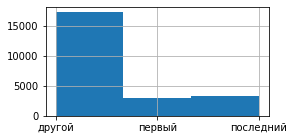

In [41]:
data['floor_type'].hist(figsize=(4,2), bins=3);

Вывод: большая часть квартир находится ни на первом, ни на последнем этаже.

In [42]:
#добавим в свобдную таблицу
results.loc[ len(results.index )] = ['Тип этажа квартиры', 'другой']

**9) Общее количество этажей в доме.**

<AxesSubplot:>

count    23242.000000
mean        10.740685
std          6.614926
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

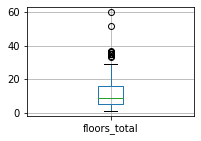

(32.5, -11.5)

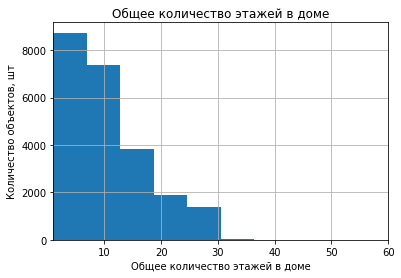

In [43]:
#построим графики
display(data.boxplot(column='floors_total', figsize=(3,2)))
display(data['floors_total'].describe())
plt.show()
ax = data['floors_total'].plot(kind='hist', 
                        title='Общее количество этажей в доме',  
                        xlim=(data['floors_total'].min(), data['floors_total'].max()),
                        bins=10,
                        grid=True)
ax.set(xlabel="Общее количество этажей в доме", ylabel='Количество объектов, шт');
#посмотрим значения 1.5-х интервалов с помощью функции
quantile_functional (data, 'floors_total')

Высота большинства домой составляет на более 32 этажей, самыми популярными являются значения от 5 до 16 этажжей.

In [44]:
#добавим в свобдную таблицу
results.loc[ len(results.index )] = ['Общее количество этажей в доме', 'от 5 до 16']

**10) Расстояние до центра города в метрах.**

<AxesSubplot:>

count    17832.000000
mean     14359.432617
std       8580.072266
min        181.000000
25%       9554.000000
50%      13215.000000
75%      16383.500000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

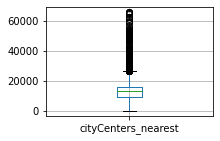

(26627.75, -690.25)

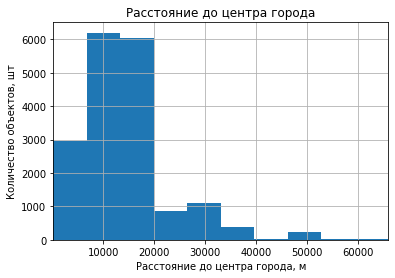

In [45]:
#построим графики 
display(data.boxplot(column='cityCenters_nearest', figsize=(3,2)))
display(data['cityCenters_nearest'].describe())
plt.show()
ax = data['cityCenters_nearest'].plot(kind='hist', 
                        title='Расстояние до центра города',  
                        xlim=(data['cityCenters_nearest'].min(), data['cityCenters_nearest'].max()),
                        bins=10,
                        grid=True)
ax.set(xlabel="Расстояние до центра города, м", ylabel='Количество объектов, шт')
#посмотрим значения 1.5-х интервалов с помощью функции
quantile_functional (data, 'cityCenters_nearest')

Вывод: большинство объектов находится на расстоянии до 26.6 км, самое частовстречающиеся значения - на расстоянии от 9.5 до 16.3 км от центра города.

In [46]:
#добавим в свобдную таблицу
results.loc[ len(results.index )] = ['Расстояние до центра города', 'от 9.5 до 16.3 км']

**11) Расстояние до ближайшего аэропорта.**

<AxesSubplot:>

count    17812.000000
mean     28853.074219
std      12716.848633
min          0.000000
25%      18488.000000
50%      26882.500000
75%      37408.250000
max      84869.000000
Name: airports_nearest, dtype: float64

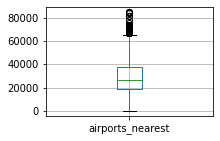

(65788.625, -9892.375)

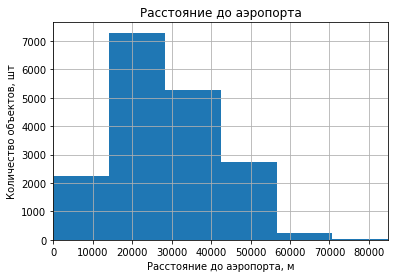

In [47]:
#построим графики
display(data.boxplot(column='airports_nearest', figsize=(3,2)))
display(data['airports_nearest'].describe())
plt.show()
ax = data['airports_nearest'].plot(kind='hist', 
                        title='Расстояние до аэропорта',  
                        xlim=(data['airports_nearest'].min(), data['airports_nearest'].max()),
                        bins=6,
                        grid=True)
ax.set(xlabel="Расстояние до аэропорта, м", ylabel='Количество объектов, шт')
#посмотрим значения 1.5-х интервалов с помощью функции
quantile_functional (data, 'airports_nearest')

Вывод: чаще всего объекты находятся на расстоянии от аэропорта не более, чем 65.7 км. Большее количество квартир находится на расстоянии от 18.4 до 37.4 км до аэропорта.

In [48]:
#добавим в свобдную таблицу
results.loc[ len(results.index )] = ['Расстояние до ближайшего аэропорта', 'от 18.4 до 37.4 км']

**12) Расстояние до ближайшего парка.**

<AxesSubplot:>

count    7820.000000
mean      493.767639
std       344.069580
min         1.000000
25%       288.750000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

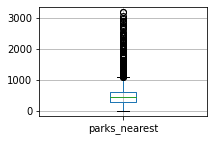

(1101.875, -199.125)

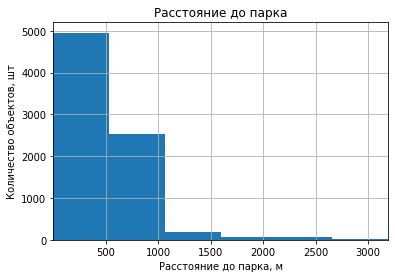

In [49]:
#строим графики
display(data.boxplot(column='parks_nearest', figsize=(3,2)))
display(data['parks_nearest'].describe())
plt.show()
ax = data['parks_nearest'].plot(kind='hist', 
                        title='Расстояние до парка',  
                        xlim=(data['parks_nearest'].min(), data['parks_nearest'].max()),
                        bins=6,
                        grid=True)
ax.set(xlabel="Расстояние до парка, м", ylabel='Количество объектов, шт')
#посмотрим значения 1.5-х интервалов с помощью функции
quantile_functional (data, 'parks_nearest')

Вывод: основная часть объектов находятся на расстоянии километра от парка, самое популярное значение - от 288 до 614 м.

In [50]:
#добавим в свобдную таблицу
results.loc[ len(results.index )] = ['Расстояние до ближайшего парка', 'от 288 до 614 м']

**13) День и месяц публикации объявления.**

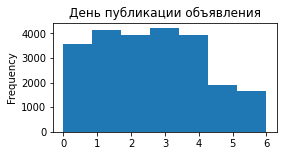

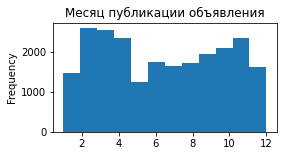

In [51]:
data['weekday'].plot(kind='hist', title='День публикации объявления', figsize=(4,2), bins=7);
plt.show()
data['month'].plot(kind='hist', title='Месяц публикации объявления', figsize=(4,2), bins=12);

Вывод: чаще всего объявления публикуют по будням с пн по пт, а самыми популярными месяцами являются февраль, март, апрель и октябрь, ноябрь.

In [52]:
#добавим в свобдную таблицу
results.loc[ len(results.index )] = ['День публикации объявления', 'пн-пт']
results.loc[ len(results.index )] = ['Месяц публикации объявления', 'февраль-апрель, октябрь-ноябрь']

###  Анализ скорости продажи квартиры.

count    20243.000000
mean       179.273178
std        218.307404
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

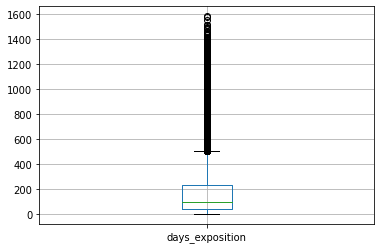

In [53]:
data.boxplot(column='days_exposition')
display(data['days_exposition'].describe())
#считаем количество объектов до обработки
count1 = data['days_exposition'].count()

Среднее количество дней размещения объявления - 179, тогда как медианное - 95. Судя по всему, многие объявления провели от момента публикации до момента снятия объявления больше года. Вероятнее всего за такой срок они уже стали не актуальны (так как цена на недвижмость меняется очень быстро). Чтобы оценить более реалистичную картину, уберем такие объявления.

<AxesSubplot:>

count    19516.000000
mean       149.905563
std        155.385666
min          1.000000
25%         43.000000
50%         90.000000
75%        205.000000
max        729.000000
Name: days_exposition, dtype: float64

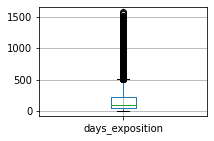

'Процент данных, которые остались после обработки: 96.41%'

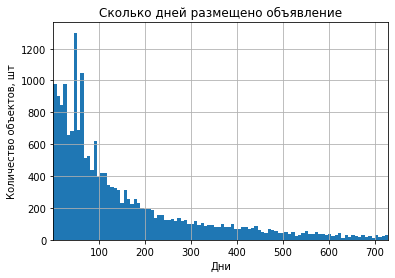

In [54]:
#отбросим объеялвения, которые провисели больше 730 дней
new_data = data.loc[data['days_exposition'] < 730]


display(data.boxplot(column='days_exposition', figsize=(3,2)))
display(new_data['days_exposition'].describe())
plt.show()
ax = new_data['days_exposition'].plot(kind='hist', 
                        title='Сколько дней размещено объявление',  
                        xlim=(new_data['days_exposition'].min(), new_data['days_exposition'].max()),
                        bins=100,
                        grid=True)
ax.set(xlabel="Дни", ylabel='Количество объектов, шт')
#считаем количество объектов после обработки
count2 = new_data['days_exposition'].count()
#смотрим, не выбросили ли слишком много данных
display(f'Процент данных, которые остались после обработки: {(count2/count1)*100:0.2f}%')

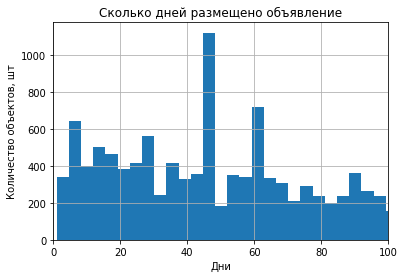

In [55]:
#отдельно посмотрим на диапазон от 0 до 100 дней
ax = new_data['days_exposition'].plot(kind='hist', 
                        title='Сколько дней размещено объявление',  
                        xlim=(0,100),
                        bins=200,
                        grid=True)
ax.set(xlabel="Дни", ylabel='Количество объектов, шт');

Данные сразу же поменялись, теперь среднее количество дней - 151, а медианное - 90. Также видны пики в районе 45, 60 и 90 дней - это связано с автоматическим снятием объявления Яндекс.Недвижимостью. Быстрыми продажами можно считать лоты, которые были выкуплены в течение одного месяца, долгими - продаи до трех месяцев. Все остальные случаи сроками выше трех месяцев можно считать необычно долгими. Причин такого затягивания продажи может быть несколько:
- это очень редкие объекты элитной недвиимости (большая площадь, много комнат, очень высокая цена);
- это объекты с очень низкой транспортной доступностью в непопулярных направлениях (далекие поселки Лен. области);
- это объекты, которые в целом никто не торопится продавать, ставят цены выше среднего по району и думают "если вдруг купят по такой цене, тогда продам", но по такой завышенной цене никто не покупает;
- это объекты, сделку по которым забыли закрыть вовремя, поэтому объявление было не закрыто в течение нескольких лет.  

Для дальнейшего анализа, где исследуется влияние цены, такие объекты (объявление о которых провисело больше трех месяцев) лучше не рассматривать, так как такие обявления будут сильно искажать представление о цене.

### Влияние различных факторов на стоимость объекта

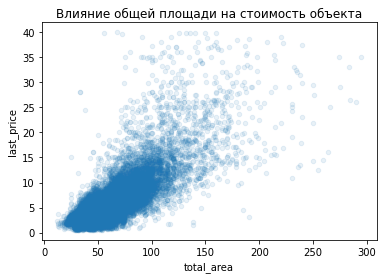

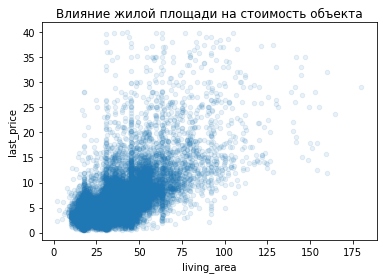

<AxesSubplot:title={'center':'Влияние года на стоимость объекта'}, xlabel='year'>

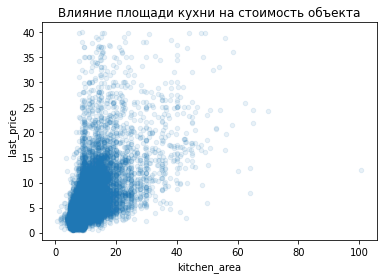

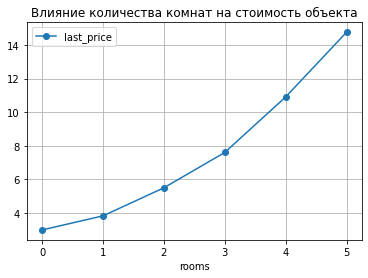

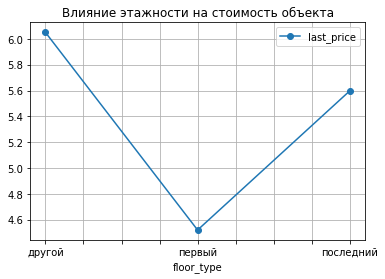

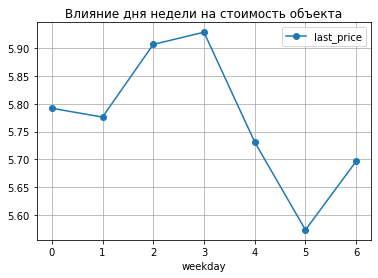

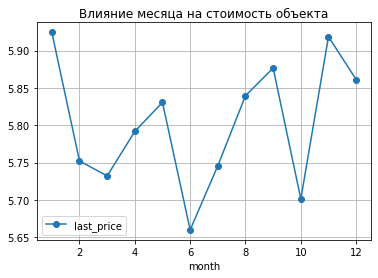

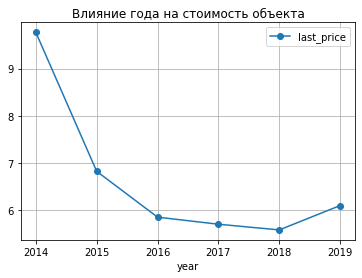

In [56]:
#влияние общей площади на стоимость объекта
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1, title='Влияние общей площади на стоимость объекта')
plt.show();
#влияние общей площади на стоимость объекта
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.1, title='Влияние жилой площади на стоимость объекта')
plt.show()
#влияние площади кухни на стоимость объекта
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.1, title='Влияние площади кухни на стоимость объекта')

#влияние количества комнат на стоимость объекта
data.pivot_table(index='rooms', values='last_price').plot(style='o-', grid=True, title='Влияние количества комнат на стоимость объекта')

#влияние этажности на стоимость объекта
data.pivot_table(index='floor_type', values='last_price').plot(style='o-', grid=True, title='Влияние этажности на стоимость объекта')

#влияние даты размещения объявления
data.pivot_table(index='weekday', values='last_price').plot(style='o-', grid=True, title='Влияние дня недели на стоимость объекта')
data.pivot_table(index='month', values='last_price').plot(style='o-', grid=True, title='Влияние месяца на стоимость объекта')
data.pivot_table(index='year', values='last_price').plot(style='o-', grid=True, title='Влияние года на стоимость объекта')

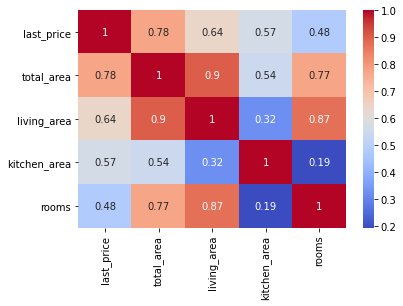

In [57]:
#построим тепловую карту, на которой отразим значение коэффициента корреляции
corr_analysis = new_data.loc[:,['last_price', 'total_area','living_area', 'kitchen_area', 'rooms']]
sns.heatmap(corr_analysis.corr(), annot = True, cmap= 'coolwarm');

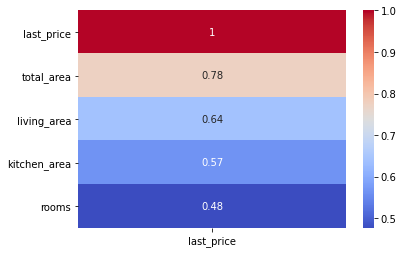

In [58]:
#отдельно вынесем столбец с зависимостью параметров от цены
sns.heatmap(corr_analysis.corr()[['last_price']].sort_values(by='last_price', ascending=False), annot = True, cmap= 'coolwarm');

На основе полученных графиков можно сделать следующие выводы:
- самый высокий уровень корреляции наблюдается между ценой за объект и его площадью: коэффициент достигает значения 0.78, а по графику видно, что с ростом площади увеличивается цена;
- также высокий уровень корреляции (коэффициент равен 0.64) наблюдается между жилой площадью и ценой: чем больше площадь - тем дороже объект;
- чем больше площадь кухни (а значит и квартиры в целом), тем выше цена, коэффициент корелляции между данными параметрами составляет 0.57;
- цена также растет и при увеличении количества комнат, коэффициент корелляции между данными параметрами составляет 0.48;
- между этажом и ценой зависимость слабая, но по графику видно, что объекты на первом этажах стоят дешевле остальных.  

Касательно дня, месяца и года размещения публикации: коэффициент корреляции отрицательный, так как видна тенденция к убыванию:
- по будням сделки закрываются по более высокой цене, нежели в сб и вс, самый пик по цене - чт; 
- самые высокие цены - в начале и конце года, самое выгодное для продажи время в январе и ноябре, а вот самое выгодное время для покупки - июнь и октябрь, в это время цены самые низкие;
- относительно года видно как цена падает после 2014 (период кризиса), а потом начинает расти вверх с 2019 года.

### Населенные пункты с самой низкой и высокой стоимостью квадратного метра.

**Задача:** Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [59]:
#отбираем 10 пунктов с наибольшим числом объявлений
popular_ten = data['locality_name'].value_counts().head(10)
#создаем таблицу, в которой присутствуют только объекты из первой десятки
ten_stat = data.query('locality_name in (@popular_ten.index)')
#считаем среднюю цену одного квадратного метра
stat = ten_stat.pivot_table(index='locality_name', values='per_meter', aggfunc='mean')
stat['per_meter'] = round(stat['per_meter'],2)  #округляем цену 
display(stat.sort_values(by='per_meter', ascending=False))

,per_meter
locality_name,
Санкт-Петербург,111671.51
Пушкин,103221.06
деревня Кудрово,92473.55
поселок Парголово,90332.26
поселок Мурино,85681.76
поселок Шушары,78677.36
Колпино,75333.30
Гатчина,68746.15
Всеволожск,68654.47


Вывод: Самая высокая стоимость квадратного метра наблюдается в Санкт-Петербурге и составляет 108,5 тыс/кв.метр. Самая низкая стоимость квадратного метра наблюдается в Выборге и составляет 58,3 тыс/кв.метр (практически в два раза ниже, чем в Санкт-Петербурге).

### Средняя цена каждого километра в Санкт-Петербурге.

**Задача:** Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

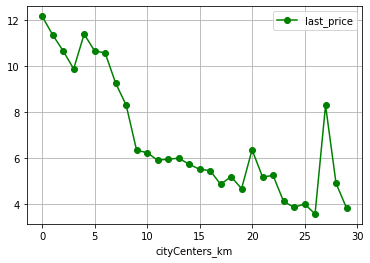

In [60]:
SPb = data.query('locality_name == "Санкт-Петербург"')
SPb['cityCenters_km'] = data['cityCenters_km'].fillna(0).astype(int)
SPb.pivot_table(index='cityCenters_km', values='last_price', aggfunc='mean').plot(style='o-', grid=True, color='green');


Исходя из графика можно сделать вывод, что "центр города" заканчивается в пределах 7 км от центра. После чего цена резко начинает проседать. На расстоянии от 8 до 30 км от центра цена плавно спускается вниз, при этом в некоторых местах появляются пики, которые, вероятнее всего связаны с наличием там загородной элитной недвижимости.

## Общий вывод

Проведен анализ данных сервиса Яндекс.Недвижимость по объектам Санкт-Петербурга и Ленинградской области. На основе полученных результатов установлены следующие параметры, на основе которых можно определять рыночную стоимость объектов недвижимости.

**1. Анализ парметров объекта**

Результат анализа параметров объекта можно вывести в одну сводную таблицу. В ней представлены самые популярные значения различных параметров среди представленных.

In [61]:
results

,Показатель,Результат
0,Общая площадь,40-68 м^2
1,Жилая площадь,18-42 м^2
2,Площадь кухни,7-12 м^2
3,Цена объекта,3.5-6.5 млн руб
4,Количество комнат,от 1 до 3
5,Высота потолков,от 2.6 до 2.7 м
6,Этаж квартиры,со 2 по 8
7,Тип этажа квартиры,другой
8,Общее количество этажей в доме,от 5 до 16
9,Расстояние до центра города,от 9.5 до 16.3 км


**2. Анализ скорости продажи квартиры**

Основную массу квартир продают в течение первых трех месяцев, если срок превышет данное значение, то это уже затянувшаяся продажа и с объектом что-то не то (либо отсутствует мотивация к продаже, либо цена не соответсвует среднерыночной и сильно завышена). Также большая доля объявлений, которые закрываются автоматически в несколько этапов: 45, 60, 90 дней с момента публикации.

**3. Влияние различных факторов на стоимость объекта**

Сильнее всего на стоимость объекта влияет его общая площадь (соответственно жилая и площадь кухни в том числе) и количество комнат: чем больше - тем выше цена. При этом квартиры, расположенные на первом этаже дешевле, чем все остальные. Самые успешные продажи происходят в ср и чт, а вот с пт по вс квартиры уходят по более низкой цене. Скорее всего это связано с тем, что оформление сделок проходит в будние дни, а в выходные люди спешат продать квартиру к началу недели и начинают торговаться. По месяцам пик по цене достигается в январе и ноябре, а вот самые низкие цены наблюдаются в июне и октябре. Спад цен в июне можно связать с началом сезона отпусков, когда люди торопятся быстрее продать квартиру и торгуются, а подъем цены под конец года можно обосновать повышением спроса на покупку квартиры "до конца года", что приводит к росту цены. Также можно обратить внимание на падение цен в период с 2014 по 2018 и их рост в 2019.

**4. Населенные пункты**

Самым дорогим населенным пунктом является Санкт-Петербург, далее по цене за квадратный метр за ним следуют его пригороды - Мурино, Парнас, Шушары. Чем дальше от Санкт-Петербурга находится объект, тем меньше цена за квадратный метр.

**5. Средняя цена каждого километра в Санкт-Петербурге**

Здесь ситуация как и в целом по области - чем дальше от центра, тем дешевле. Однако стоит обращать внимание на элитную загородную недвижимость, там цена может сравняться с ценой объекта, находящегося в 7 км от центра города.